In [2]:
using MAT
using DSP
using Plots
gr(fmt="png", size=(512,512))

function getbandrange(bandname)
    """Return the cutoff frequecy of each band."""
    bandrange = Dict(
            "delta" => (  2,  4),
            "theta" => (  4,  8),
            "alpha" => (  8, 12),
            "beta" =>  ( 15, 30),
            "gamma" => ( 30,150),
            "low gamma" => (30, 80),
            "high gamma" => (80,150),
            "lowpass" => (0.5,200),
            "highpass" => (200,500))
    return bandrange[bandname]
end

getbandrange (generic function with 1 method)

In [5]:
filename = "180831-1-5.mat"
datadir = "../../Data/Chen Zhou/EEG/Compact"
resultdir = "../../Result/"

# channels = data["channels"]
# markers = data["markers"][0,:]
# times = data["times"][0,:]
# Import data
fs = 2000
data = matread(joinpath(datadir, filename))
channels = data["channels"]
markers = data["markers"]
times = data["times"];
times[end]

┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = matopen(::String, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool) at MAT.jl:56
└ @ MAT /Users/yizhan/.julia/packages/MAT/Pn0pR/src/MAT.jl:56
┌ Warning: `Array{T}(m::Int) where T` is deprecated, use `Array{T}(undef, m)` instead.
│   caller = read_bswap(::IOStream, ::Bool, ::Type{UInt32}, ::Int64) at MAT_v5.jl:90
└ @ MAT.MAT_v5 /Users/yizhan/.julia/packages/MAT/Pn0pR/src/MAT_v5.jl:90
┌ Warning: `Array{T}(m::Int) where T` is deprecated, use `Array{T}(undef, m)` instead.
│   caller = read_bswap(::IOStream, ::Bool, ::Type{Int32}, ::Int64) at MAT_v5.jl:90
└ @ MAT.MAT_v5 /Users/yizhan/.julia/packages/MAT/Pn0pR/src/MAT_v5.jl:90
┌ Warning: `Array{T}(m::Int) where T` is deprecated, use `Array{T}(undef, m)` instead.
│   caller = read_bswap(::IOStream, ::Bool, ::Type{UInt8}, ::Int64) at MAT_v5.jl:90
└ @ MAT.MAT_v5 /Users/yizhan/.julia/packages/MAT/Pn0pR/src/MAT_v5.jl:90
┌ Warning: `Array{T}(d::NTuple{

114.9995

In [168]:
filename = "999999-9-9.mat"
datadir = "../../Data/Demo/EEG/Compact"
resultdir = "../../Result/"

# channels = data["channels"]
# markers = data["markers"][0,:]
# times = data["times"][0,:]
# Import data
fs = 2000
data = matread(joinpath(datadir, filename))
channels = data["channels"]
markers = data["markers"]
times = data["times"]
times[end]

149.99949999999998

  0.003338 seconds (193 allocations: 1.771 MiB)


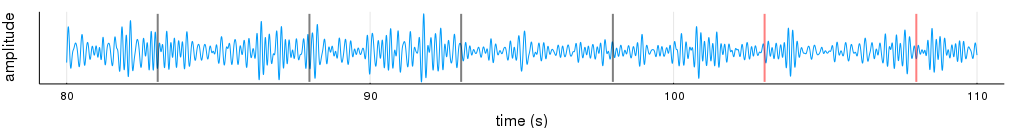

In [13]:
x = channels[109,:]
lowcut, highcut = getbandrange("theta")
responsetype = Bandpass(lowcut, highcut; fs=fs)
designmethod = Butterworth(4)
# designmethod = FIRWindow(hanning(54))
@time x_filt = filt(digitalfilter(responsetype, designmethod), x);

tspec = 80*fs:110*fs
plot(times[tspec], x_filt[tspec], size=(1024,128), legend=false, 
    yticks=[], xlims=[80,110])

grating_markers = markers["grating"][:]
entrain_markers = markers["entrain"][:]
for i in grating_markers
    plot!([i,i],[minimum(x_filt[tspec]), maximum(x_filt[tspec])], color=:black, linewidth=2, alpha=0.5)
end

for i in entrain_markers
    plot!([i,i], [minimum(x_filt[tspec]), maximum(x_filt[tspec])], color=:red, linewidth=2, alpha=0.5)
end

plot!(xlabel="time (s)", ylabel="amplitude")


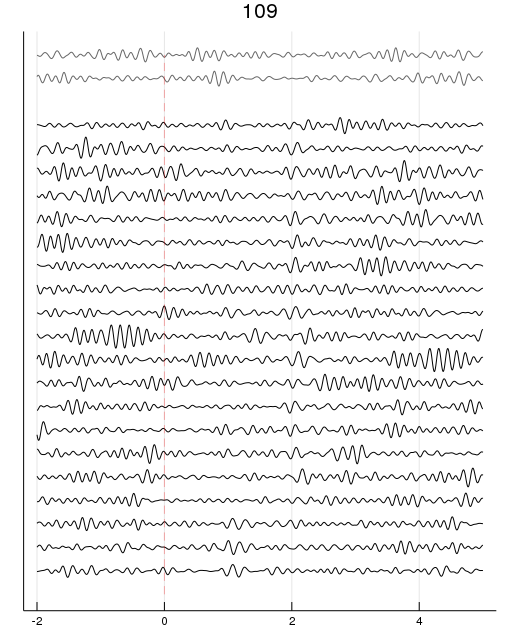

In [16]:
chidx = 109
# curve = channels[chidx, :]

curve = x_filt

roi = -2*fs:5*fs
plot(legend=false, size=(516,32*length(markers["grating"])))
step = maximum(abs.(curve))*2

for (midx, marker) in enumerate(markers["grating"])
#     print(Int(ceil(marker*fs)))
    slice = curve[roi.+Int(ceil(marker*fs))]
    
    plot!(roi/fs, slice.+step*(midx-1), color=:black)
end

for (midx, marker) in enumerate(entrain_markers)
    slice = curve[roi.+Int((marker)*fs)]
    plot!(roi/fs, slice.+step*(midx-1+21), color="#666666")
end

plot!([0,0], [-step, step*22], color="red", linestyle=:dash, alpha=0.3)
# plot!([2,2], [-step, step*22], color="red", linestyle=:dash)

plot!(yticks=[], xlim=[roi[1]/fs, roi[end]/fs], title="109")
# savefig("somatosensory_demo_beta_notap.eps")

---
# Misc